In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Problem : Principal Component Analysis
**Principal component analysis** (PCA) is a technique of dimensionality reduction, which linearly maps data onto a lower-dimensional space, so that the variance of the projected data in the associated dimensions would be maximized. In this problem, you will perform PCA on a dataset of face images.

In [12]:
X_train, X_test = [], []
y_train, y_test = [], []
for i in range(1, 41):
    for j in range(1, 10):
        img = cv2.imread('data/{}_{}.png'.format(i,j), cv2.IMREAD_GRAYSCALE)
        X_train.append(img)
        y_train.append(i)
    img = cv2.imread('data/{}_10.png'.format(i), cv2.IMREAD_GRAYSCALE)
    X_test.append(img)
    y_test.append(i)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(360, 56, 46) (360,)
(40, 56, 46) (40,)


## 1. mean face & first four eigenfaces

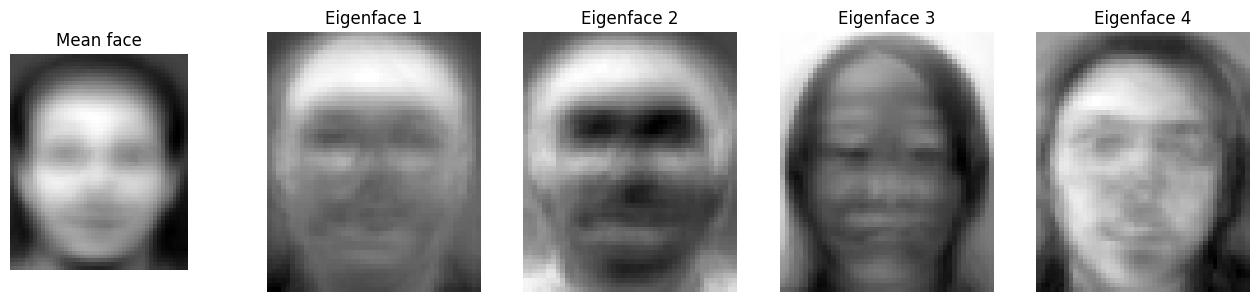

In [13]:
pca = PCA()
pca.fit(X_train.reshape(len(y_train), -1))

plt.figure(figsize=(16,12))
plt.subplot(1, 6, 1)
plt.axis('off')
plt.title('Mean face')
plt.imshow(pca.mean_.reshape(X_train[0].shape), cmap='gray')

for i in range(4):
    plt.subplot(1, 5, i+2)
    plt.axis('off')
    plt.title('Eigenface {}'.format(i+1))
    plt.imshow(pca.components_[i].reshape(X_train[0].shape), cmap='gray')
plt.show()

## 2. Reconstruct person2 image1 using the first n = 3, 50, 170, 240, 345 eigenfaces
## 3. compute the mean squared error

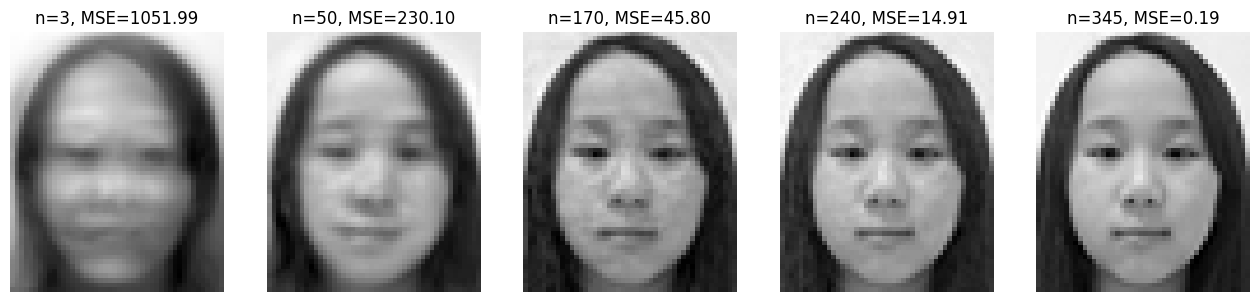

In [18]:
img = cv2.imread('data/2_1.png', cv2.IMREAD_GRAYSCALE).reshape(1, -1)
a = pca.transform(img)

plt.figure(figsize=(16,12))
n_components = [3, 50, 170, 240, 345]
for i,n in enumerate(n_components):
    face = np.zeros(img.shape)
    for j in range(n):
        face += a[0][j] * pca.components_[j]
    face = face + pca.mean_
    MSE = np.mean((img - face) ** 2)
    plt.subplot(1, 5, i+1)
    plt.axis('off')
    plt.title("n={}, MSE={:.2f}".format(n, MSE))
    plt.imshow(face.reshape(X_train[0].shape), cmap='gray')

## 4. cross-validation results

In [15]:
reduced_X_train = pca.transform(X_train.reshape(len(y_train), -1))
K = [1, 3, 5]
N = [3, 50, 170]
random = np.random.permutation(len(y_train))
reduces_X_train = reduced_X_train[random]
y_train_random = y_train[random]
for K in K:
    print("k={}".format(K))
    knn = KNeighborsClassifier(n_neighbors=K)
    for n in N:
        print("     n={}".format(n), end='')
        scores = cross_val_score(knn, reduced_X_train[:, :n], y_train, cv=3)
        print("score = {:.4f}".format(scores.mean()))

k=1
     n=3score = 0.5972
     n=50score = 0.9639
     n=170score = 0.9583
k=3
     n=3score = 0.5694
     n=50score = 0.8917
     n=170score = 0.8889
k=5
     n=3score = 0.5278
     n=50score = 0.8528
     n=170score = 0.8222


## 5. recognition rate of the testing set

In [16]:
k=1
n=50

reduced_X_test = pca.transform(X_test.reshape(len(y_test), -1))

knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(reduced_X_train[:, :n], y_train)

print("Accuracy = {:.4f}".format(knn.score(reduced_X_test[:, :n], y_test)))

Accuracy = 0.9250
